In [ ]:
# ================================================================
#  UT-HAR  quick visual explorer  (CSV → spectrogram heat-maps)
# ================================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from celluloid import Camera   

In [5]:
ROOT = Path("Data/UT_HAR") 
DATA   = ROOT / "data"
LABEL  = ROOT / "label"

In [8]:
def load(split: str):
    """load X (N,250,90) and y (N,) from the *binary* files you have"""
    X = np.load(DATA / f"X_{split}.csv")        # ← binary, despite .csv ending
    y = np.load(LABEL / f"y_{split}.csv")
    return X.reshape(-1, 250, 90).astype(np.float32), y.astype(int)

X_train, y_train = load('train')
X_test,  y_test  = load('test')
X_val,   y_val   = load('val')


In [10]:
print("Shapes →  train:", X_train.shape, y_train.shape,
      "  val:", X_val.shape, "  test:", X_test.shape,
      "  labels:", np.unique(y_train))

Shapes →  train: (3977, 250, 90) (3977,)   val: (496, 250, 90)   test: (500, 250, 90)   labels: [0 1 2 3 4 5 6]


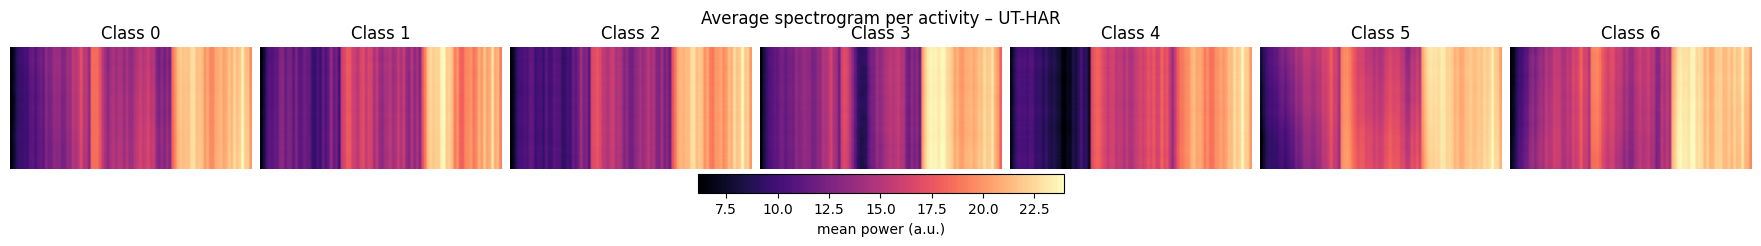

In [11]:
# 2.  one-figure summary: average spectrogram per class ----------
classes = np.unique(y_train)
fig, axes = plt.subplots(1, len(classes), figsize=(len(classes)*2.5, 2.2),
                         sharey=True, constrained_layout=True)
for ax, cls in zip(axes, classes):
    mean_map = X_train[y_train==cls].mean(axis=0)
    im = ax.imshow(mean_map, cmap='magma', aspect='auto')
    ax.set_title(f'Class {cls}')
    sns.despine(ax=ax, left=True, bottom=True)
    ax.set_xticks([]); ax.set_yticks([])
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', shrink=0.6,
                    label='mean power (a.u.)')
plt.suptitle('Average spectrogram per activity – UT-HAR', y=1.05)
plt.show()

In [12]:
# 3.  browse single examples interactively -----------------------
def show_sample(split='train', idx=0):
    X = {'train':X_train, 'val':X_val, 'test':X_test}[split]
    y = {'train':y_train, 'val':y_val, 'test':y_test}[split]
    plt.figure(figsize=(4,2.5))
    plt.imshow(X[idx], cmap='viridis', aspect='auto')
    plt.colorbar(label='power')
    plt.title(f'{split} #{idx}  –  label {y[idx]}')
    plt.xlabel('frequency bin'); plt.ylabel('time frame')
    plt.show()

# e.g.  show_sample('train', 42)


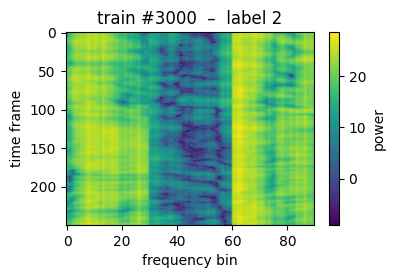

In [15]:
show_sample('train',3000)

In [ ]:
# 4.  create scrolling GIF ---------------------------- not relly gud

'''camera = Camera(plt.figure(figsize=(3,2.5)))
time_bins = X_train.shape[1]          # 250
for t in range(0, time_bins, 5):      # every 5th frame
    plt.imshow(X_train[0,:t+1], cmap='magma', aspect='auto')
    plt.title(f'label {y_train[0]}  –  t={t}')
    camera.snap()
anim = camera.animate(interval=80, blit=True)
anim.save('ut_har_scroll_1.gif', dpi=80, writer='pillow')
plt.close()'''
